**Mariam BAYO**

**Ikram BOULAASSAL**

**IDo M2 IISC**

In [2]:
import pandas as pd 
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import gspread

import re
import nltk
import os 
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
#Checking for the word "research#
from nltk.stem import PorterStemmer
#Importing Lemmatizer library from nltk :
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import ne_chunk
from nltk import RegexpParser
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# QUESTION 1 : DATA EXPLORATION

In [3]:
# Charger le fichier Excel dans un DataFrame
file = 'Ask A Manager Salary Survey 2021.csv'

In [4]:
nouveaux_noms_colonnes = ['Timestamp', 'age', 'industry','job','complement_job','annual_salary','aditional_salary','currency','other_currency','additional_context','country','state','city','work_year','year_field','educational_level','gender','race']  # Remplace avec tes nouveaux noms de colonnes

In [5]:
donnees = pd.read_csv(file, header=None, names=nouveaux_noms_colonnes)

In [6]:
donnees.shape

(27990, 18)

In [7]:
# Supprimer la première ligne
donnees = donnees.iloc[1:]

In [10]:
#Réinitialiser les index après la suppression
donnees.reset_index(drop=True, inplace=True)

In [9]:
donnees.head()

,Timestamp,age,industry,job,complement_job,annual_salary,aditional_salary,currency,other_currency,additional_context,country,state,city,work_year,year_field,educational_level,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [10]:
donnees.dtypes

Timestamp             object
age                   object
industry              object
job                   object
complement_job        object
annual_salary         object
aditional_salary      object
currency              object
other_currency        object
additional_context    object
country               object
state                 object
city                  object
work_year             object
year_field            object
educational_level     object
gender                object
race                  object
dtype: object

In [11]:
donnees['age'].head()

0    25-34
1    25-34
2    25-34
3    25-34
4    25-34
Name: age, dtype: object

In [12]:
# Statistiques descriptives pour les salaires
salary_stats = donnees['annual_salary'].describe()
print("Statistiques descriptives pour les salaires:\n", salary_stats)

Statistiques descriptives pour les salaires:
 count      27989
unique      4290
top       60,000
freq         430
Name: annual_salary, dtype: object


In [13]:
donnees['work_year'].unique()

array(['5-7 years', '8 - 10 years', '2 - 4 years', '21 - 30 years',
       '11 - 20 years', '1 year or less', '41 years or more',
       '31 - 40 years'], dtype=object)

In [14]:
donnees['year_field'].value_counts()

11 - 20 years       6525
5-7 years           6506
2 - 4 years         6236
8 - 10 years        4966
21 - 30 years       1866
1 year or less      1469
31 - 40 years        381
41 years or more      40
Name: year_field, dtype: int64

In [15]:
replace_dict = {
    '1 year or less': 0,
    '2 - 4 years': 1,
    '5-7 years': 2,
    '8 - 10 years': 3,
    '11 - 20 years': 4,
    '21 - 30 years': 5,
    '31 - 40 years': 6,
    '41 years or more': 7
}

donnees['year_field'] = donnees['year_field'].replace(replace_dict)
for a in donnees['year_field'].unique():
    print(a)

2
1
5
4
0
3
6
7


In [16]:
occurrences = donnees['gender'].value_counts()
occurrences

Woman                            21336
Man                               5450
Non-binary                         742
Other or prefer not to answer      293
Prefer not to answer                 1
Name: gender, dtype: int64

In [17]:
print(donnees.isnull().mean())

Timestamp             0.000000
age                   0.000000
industry              0.002572
job                   0.000000
complement_job        0.741327
annual_salary         0.000000
aditional_salary      0.259745
currency              0.000000
other_currency        0.992890
additional_context    0.891565
country               0.000000
state                 0.178499
city                  0.002715
work_year             0.000000
year_field            0.000000
educational_level     0.007717
gender                0.005967
race                  0.006145
dtype: float64


In [18]:
# Compter le nombre de personnes dans chaque tranche d'âge
nombre_personnes_par_age = donnees['age'].value_counts()


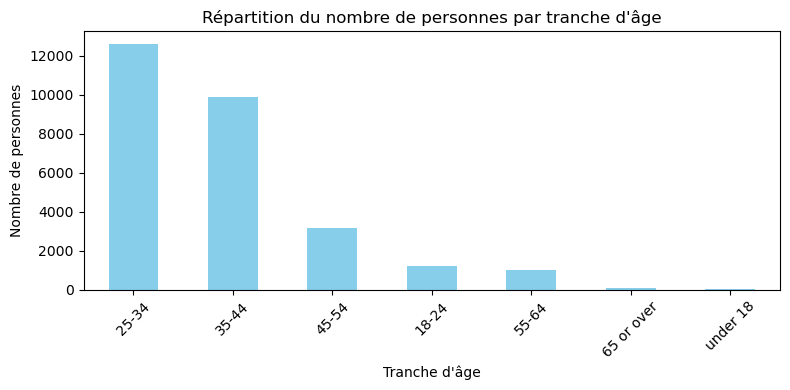

In [19]:
# Affichage graphique du nombre de personnes dans chaque tranche d'âge (histogramme)
plt.figure(figsize=(8, 4))
donnees['age'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre de personnes')
plt.title('Répartition du nombre de personnes par tranche d\'âge')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Compter le nombre de personnes dans chaque genre
nombre_personnes_par_genre = donnees['gender'].value_counts()


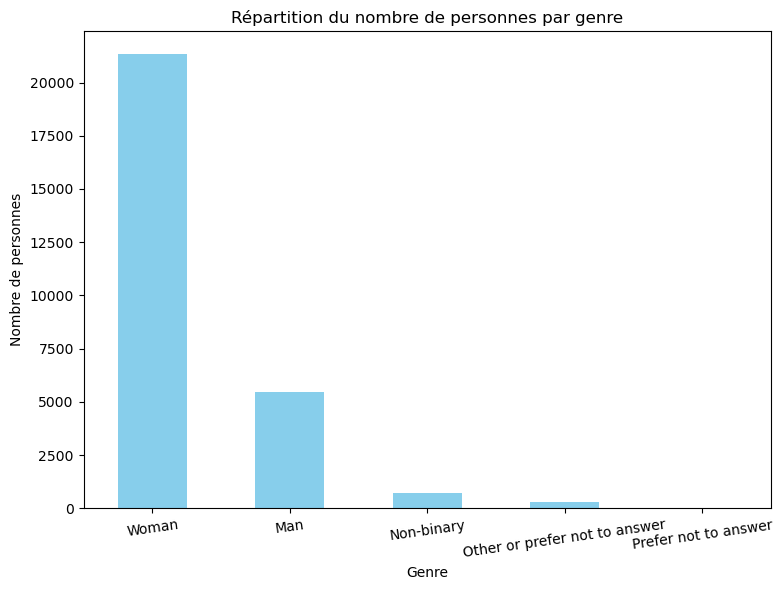

In [21]:
# Créer un graphique à barres pour représenter le nombre de personnes par genre
plt.figure(figsize=(8, 6))
nombre_personnes_par_genre.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Nombre de personnes')
plt.title('Répartition du nombre de personnes par genre')
plt.xticks(rotation=8)
plt.tight_layout()
plt.show()

In [22]:
cc=donnees[donnees['currency'].isnull()]
cc

,Timestamp,age,industry,job,complement_job,annual_salary,aditional_salary,currency,other_currency,additional_context,country,state,city,work_year,year_field,educational_level,gender,race


In [23]:
other_curr= donnees['currency'].value_counts().get('Other',0)
other_curr

157

In [24]:
OtherCurr=donnees['other_currency'].unique()
OtherCurr

array([nan, 'INR', 'Peso Argentino', '$76,302.34',
       'My bonus is based on performance up to 10% of salary',
       'I work for an online state university, managing admissions data. Not direct tech support. ',
       '0', 'MYR', 'CHF', 'KWD', 'NOK', 'Na ', 'USD', 'BR$', 'SEK',
       'Base plus Commission ', 'canadian', 'Dkk', 'EUR', 'COP', 'TTD',
       'Indian rupees', 'BRL (R$)', 'Mexican pesos', 'CZK', 'GBP', 'DKK',
       'Bdt', 'RSU / equity', 'ZAR', 'Additonal = Bonus plus stock',
       'American Dollars', 'Php', 'PLN (Polish zloty)',
       'Overtime (about 5 hours a week) and bonus', 'czech crowns',
       'Stock ', 'TRY', 'Norwegian kroner (NOK)', 'CNY', 'ILS/NIS',
       '55,000', 'AUD & NZD are not the same currency...', 'US Dollar',
       'Canadian ', 'AUD', 'BRL', 'NIS (new Israeli shekel)', '-',
       'RMB (chinese yuan)', 'Taiwanese dollars',
       "AUD and NZD aren't the same currency, and have absolutely nothing to do with each other :(",
       'NZD', 'Phili

<h4> on constate que dans cette colonne 'other_currency', les valeurs renseignées sont pas toujours bonnes, donc il faut un traitement supplémentaire pour les remplacer et corriger</h4>

In [22]:
#compter les occurences de chaque niveau d'éducation
pourcentages_education = donnees['educational_level'].value_counts(normalize=True) * 100

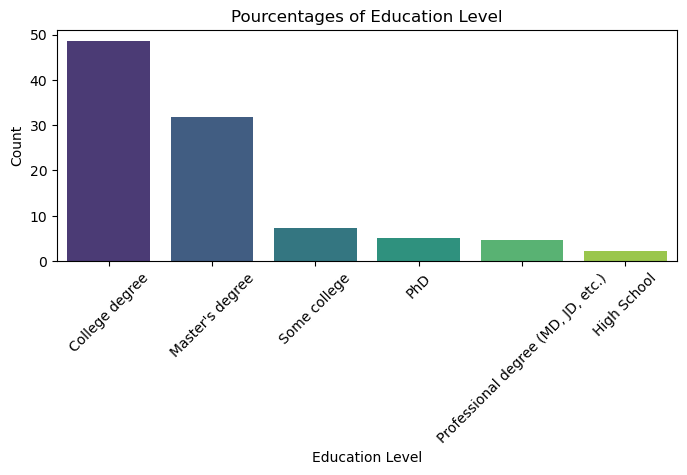

In [26]:
# Create a bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x=pourcentages_education.index, y=pourcentages_education.values, palette="viridis")

# Customize the plot
plt.title("Pourcentages of Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Display the plot
plt.show()



In [27]:
#créer un tableau croisé pour compter les occurences de chaque niveau d'éducation pour genre
tableau_croise_educ_gender = pd.crosstab(donnees['educational_level'], donnees['gender'])

In [28]:
tableau_croise_educ_gender

gender,Man,Non-binary,Other or prefer not to answer,Prefer not to answer,Woman
educational_level,,,,,
College degree,2706,372,152,0,10208
High School,250,19,8,0,358
Master's degree,1397,213,80,0,7104
PhD,277,23,16,1,1097
"Professional degree (MD, JD, etc.)",190,17,12,0,1091
Some college,588,96,21,0,1348


<Figure size 1000x600 with 0 Axes>

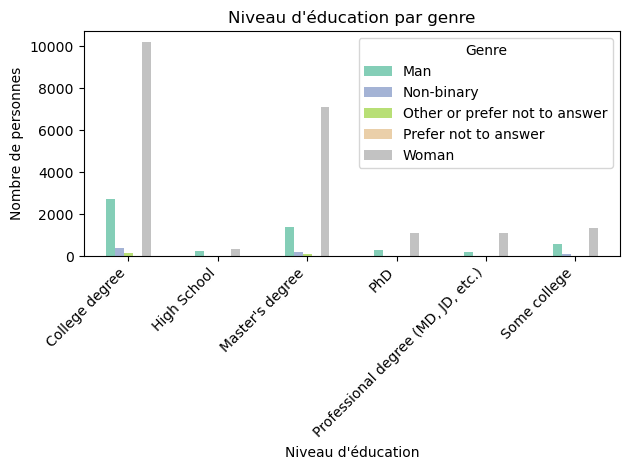

In [29]:
# Créer un graphique à barres groupées pour représenter le niveau d'éducation par genre
plt.figure(figsize=(10, 6))
#tableau_croise_educ_gender.plot(kind='bar', alpha=0.8)
tableau_croise_educ_gender.plot(kind='bar', colormap='Set2', alpha=0.8)
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Nombre de personnes')
plt.title('Niveau d\'éducation par genre')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

In [30]:
# Créer un tableau croisé pour compter les occurrences de chaque race par genre
tableau_croise_race_gender = pd.crosstab(donnees['race'], donnees['gender'])

In [31]:
# Créer un tableau croisé pour compter les occurrences de chaque race par niveau d'éducation
tableau_croise_race_education = pd.crosstab(donnees['race'], donnees['educational_level'])


In [32]:
# Supprimer les valeurs nulles dans la colonne 'annual_salary' et 'gender'
donnees = donnees.dropna(subset=['annual_salary', 'gender'])


# QUESTION 2 : DATA ITERPRETATION AND DATA ANALYSIS/MINING PROBLEMS

# The representation of each feature :
La dataset "Ask-A-Manager Salary Survey 2021" recueille des données salariales de professionnels par le biais 
d'une enquête en ligne. Les caractéristiques incluent principalements 3 catégories d'informations : 

- Des informations démographiques telles que : l'âge, le genre et la localisation; 

- Des détails professionnels comme :l'industrie, le titre du poste et les années d'expérience;

- Ainsi que des informations salariales telles que :le salaire annuel et les bonus.

# The features who are informative and interesting to keep :
Parmis ces informations, les caractéristiques interessantes sont entres autres  : 
    
- Annual Salary: Il s'agit de la variable cible de la modélisation prédictive. Prédire les salaires sur la base d’autres
caractéristiques pourrait constituer un problème de régression.

- Year of experience: Utile pour comprendre la corrélation entre l'expérience et le salaire et aussi pour prédire le salaire.

- Job Title: Important pour explorer les différences de salaire entre différents titres de poste et potentiellement prédire le salaire en fonction des fonctions.
    
- Industry Work: Utile pour analyser les variations de salaire entre différents secteurs et pour prédire les salaires en   fonction du secteur.

- Your Work Country:Utile pour comprendre les différences salariales régionales et pour prédire le salaire en fonction de la situation géographique.

- Gender: Important pour enquêter sur les écarts de rémunération entre hommes et femmes et les biais potentiels en matière de salaire. Il peut être utilisé dans des modèles soucieux de l’équité.

- Education level: Pertinent pour explorer l’impact de l’éducation sur le salaire et pour prédire le salaire en fonction du niveau d’éducation.

# For what kind of learning problems could you use this data set :

Avec ces données on peut appliquer differents types d'algorithme de marchine learning : 
- La régression : On pourra utiliser  les caractéristiques numériques (tellesque: l'années d'expérience, le niveau d'éducation) pour prédire le salaire, afin de comprendre les facteurs influençant les revenus.

- La classification : Pour prédire les catégories de postes en fonction d'éléments tels que l'intitulé du poste, l'éducation. Cela peut aider à identifier des similitudes au sein de groupes professionnels spécifiques.
 
- Clustering :On peut appliquer des algorithmes de  clustering pour identifier des groupes de professionnels ayant des caractéristiques similaires

# Question 4: Data cleaning: Apply data cleaning solutions to repair the dataset

<h3>changer les valeurs de gender</h3>

In [33]:
donnees.dropna(subset=['gender'], inplace=True)

In [34]:
donnees['gender'] = donnees['gender'].replace(['Woman'],'Female')

In [35]:
donnees['gender'] = donnees['gender'].replace(['Man'],'Male')

<h3>supprimer les valeurs redondantes</h3> :


In [36]:
donnees.shape

(27822, 18)

In [37]:
data =donnees.drop_duplicates()
data.shape

(27822, 18)

In [38]:
sorted(donnees['country'].unique())

[' New Zealand',
 ' U.S.',
 ' US',
 ' United States',
 '$2,175.84/year is deducted for benefits',
 'ARGENTINA BUT MY ORG IS IN THAILAND',
 'Afghanistan',
 'Africa',
 'America',
 'Aotearoa New Zealand',
 'Argentina',
 'Australi',
 'Australia',
 'Australia ',
 'Australian ',
 'Austria',
 'Austria, but I work remotely for a Dutch/British company',
 'Bangladesh',
 'Bangladesh ',
 'Belgium',
 'Belgium ',
 'Bermuda',
 'Bosnia and Herzegovina',
 'Brasil',
 'Brazil',
 'Brazil ',
 'Britain ',
 'Bulgaria',
 'CANADA',
 'CANADA ',
 'California ',
 'Cambodia',
 'Can',
 'Canad',
 'Canada',
 'Canada ',
 'Canada and USA',
 'Canada, Ottawa, ontario',
 'Canadw',
 'Canadá',
 'Canda',
 'Catalonia',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Company in Germany. I work from Pakistan.',
 'Congo',
 'Contracts',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia ',
 'Csnada',
 'Cuba',
 'Currently finance',
 'Cyprus',
 'Czech Republic',
 'Czech Republic ',
 'Czech republic',
 'Czechia',
 'Danmark',
 'Denmark

In [39]:
print(donnees.shape)
donnees_without_duplicates = donnees.drop_duplicates()
print(donnees_without_duplicates.shape)

(27822, 18)
(27822, 18)


In [40]:
# Filling NaN or Null values in 'currency' with values from 'other currency'
donnees['currency'].fillna(donnees['other_currency'], inplace=True)

In [41]:
donnees['currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [42]:
# Remplacer la valeur 'other' dans la colonne 'currency' par les valeurs correspondantes de 'other_currency'
donnees.loc[donnees['currency'] == 'Other', 'currency'] = donnees.loc[donnees['currency'] == 'Other', 'other_currency']

In [43]:
donnees['currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'INR', 'Peso Argentino',
       'CHF', 'MYR', 'ZAR', 'SEK', 'HKD', 'NOK', 'BR$', 'Dkk', 'TTD',
       'Indian rupees', 'BRL (R$)', 'Mexican pesos', 'CZK', 'DKK', 'Bdt',
       'American Dollars', 'Php', 'PLN (Polish zloty)', 'czech crowns',
       'TRY', 'Norwegian kroner (NOK)', 'CNY', 'ILS/NIS', nan,
       'US Dollar', 'BRL', 'NIS (new Israeli shekel)',
       'RMB (chinese yuan)', 'AUD', 'JPY', 'Taiwanese dollars',
       'Philippine Peso', 'SGD', 'KRW (Korean Won)', 'Czk', 'THB', 'IDR ',
       'Sgd', 'Nok', 'NZD', 'ILS (Shekel)', 'DKK ', 'China RMB',
       'AUD Australian ', 'LKR', 'Polish Złoty', 'Philippine peso (PHP)',
       'Australian Dollars ', 'PHP', 'Equity', 'ARS',
       'Argentinian peso (ARS)', 'Israeli Shekels', 'ILS', 'MXN',
       'PhP (Philippine Peso)', 'PLN', 'KRW', 'SAR', 'RM', 'IDR',
       'Argentine Peso', 'Philippine Pesos', 'Ils', 'INR (Indian Rupee)',
       'NTD', 'Danish Kroner', 'Korean Won ', 'dkk', 'Eur

***Il faut appliquer un traitement sur les currencies qui remplace Taiwanese dollars par son code ISO***

In [44]:
# Codes ISO 4217 standard déjà identifiés
codes_ISO_standard = ['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'INR']

# Mapping des valeurs non standard vers les codes ISO 4217
mapping_non_standard = {
    'US Dollar': 'USD',
    'American Dollars': 'USD',
    'Euro': 'EUR',
    'Peso Argentino': 'ARS',
    'CHF': 'CHF',
    'MYR': 'MYR',
    'ZAR': 'ZAR',
    'SEK': 'SEK',
    'HKD': 'HKD',
    'NOK': 'NOK',
    'BR$': 'BRL',
    'Dkk': 'DKK',
    'TTD': 'TTD',
    'Indian rupees': 'INR',
    'Mexican pesos': 'MXN',
    'CZK': 'CZK',
    'Bdt': 'BDT',
    'Php': 'PHP',
    'PLN (Polish zloty)': 'PLN',
    'czech crowns': 'CZK',
    'TRY': 'TRY',
    'Norwegian kroner (NOK)': 'NOK',
    'CNY': 'CNY',
    'ILS/NIS': 'ILS',
    'NIS (new Israeli shekel)': 'ILS',
    'RMB (chinese yuan)': 'CNY',
    'AUD': 'AUD',
    'JPY': 'JPY',
    'Taiwanese dollars': 'TWD',
    'Philippine Peso': 'PHP',
    'SGD': 'SGD',
    'KRW (Korean Won)': 'KRW',
    'Czk': 'CZK',
    'THB': 'THB',
    'IDR ': 'IDR',
    'Sgd': 'SGD',
    'Nok': 'NOK',
    'NZD': 'NZD',
    'ILS (Shekel)': 'ILS',
    'China RMB': 'CNY',
    'AUD Australian ': 'AUD',
    'LKR': 'LKR',
    'Polish Złoty': 'PLN',
    'Philippine peso (PHP)': 'PHP',
    'Australian Dollars ': 'AUD',
    'Equity': 'Other',
    'ARS': 'ARS',
    'Argentinian peso (ARS)': 'ARS',
    'Israeli Shekels': 'ILS',
    'PhP (Philippine Peso)': 'PHP',
    'PLN': 'PLN',
    'KRW': 'KRW',
    'SAR': 'SAR',
    'RM': 'MYR',
    'IDR': 'IDR',
    'Argentine Peso': 'ARS',
    'Philippine Pesos': 'PHP',
    'Ils': 'ILS',
    'INR (Indian Rupee)': 'INR',
    'NTD': 'TWD',
    'Danish Kroner': 'DKK',
    'Korean Won ': 'KRW',
    'dkk': 'DKK',
    'SGD ': 'SGD',
    'Mexican Pesos': 'MXN',
    'THAI  BAHT': 'THB',
    'Thai Baht ': 'THB',
    'croatian kuna': 'HRK',
    'PLN (Zwoty)': 'PLN',
    'Rupees': 'INR',
    'Singapore Dollara': 'SGD',
    'NGN': 'NGN',
    'COP': 'COP'
}

# Appliquer le remplacement sélectif aux valeurs non standard
donnees['currency'] = donnees['currency'].apply(lambda x: mapping_non_standard.get(x, x) if x not in codes_ISO_standard else x)


In [45]:
donnees['currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'INR', 'ARS', 'CHF', 'MYR',
       'ZAR', 'SEK', 'HKD', 'NOK', 'BRL', 'DKK', 'TTD', 'BRL (R$)', 'MXN',
       'CZK', 'BDT', 'PHP', 'PLN', 'TRY', 'CNY', 'ILS', nan, 'AUD', 'JPY',
       'TWD', 'SGD', 'KRW', 'THB', 'IDR', 'NZD', 'DKK ', 'LKR', 'Other',
       'SAR', 'HRK', 'NGN', 'COP'], dtype=object)

In [46]:
# Compter le nombre de valeurs "other" dans la colonne "currency"
donnees['currency'].value_counts().get('Other',0)

1

In [47]:
# Sélectionner la valeur de 'other_currency' lorsque 'currency' est égal à 'Other'
donnees.loc[donnees['currency'] == 'Other', 'other_currency']

14915    Equity
Name: other_currency, dtype: object

In [48]:
# Sélectionner toutes les lignes où 'other_currency' est égal à 'Equity'
rows_with_equity = donnees[donnees['other_currency'] == 'Equity']
rows_with_equity

,Timestamp,age,industry,job,complement_job,annual_salary,aditional_salary,currency,other_currency,additional_context,country,state,city,work_year,year_field,educational_level,gender,race
14915,4/28/2021 15:43:39,25-34,"Marketing, Advertising & PR",Marketing Content Creator,NaN,"65,000",5000,Other,Equity,NaN,United States,New York,Brooklyn,8 - 10 years,1,College degree,Female,White


***we decided to replace the value 'Other/Equity' of the column other_currency by USD since the Country is the United states***

In [49]:
# Remplacer  'Equity' par 'USD' dans la colonne 'currency'
donnees['currency'] = donnees['currency'].replace('Other', 'USD')


In [50]:
donnees['currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'INR', 'ARS', 'CHF', 'MYR',
       'ZAR', 'SEK', 'HKD', 'NOK', 'BRL', 'DKK', 'TTD', 'BRL (R$)', 'MXN',
       'CZK', 'BDT', 'PHP', 'PLN', 'TRY', 'CNY', 'ILS', nan, 'AUD', 'JPY',
       'TWD', 'SGD', 'KRW', 'THB', 'IDR', 'NZD', 'DKK ', 'LKR', 'SAR',
       'HRK', 'NGN', 'COP'], dtype=object)

***Uniformisation des libellés : Créez une correspondance entre les libellés pour les regrouper en une seule représentation. Par exemple, remplacez tous les libellés comme 'US', 'USA', 'United States', 'United States of America' par 'United States'.
Suppression des espaces superflus : Certains libellés peuvent contenir des espaces en trop à la fin ou au début. Supprimez-les pour avoir une uniformité dans les données.
Traitement des anomalies : Certains libellés peuvent être des erreurs de saisie ou des valeurs incorrectes. Vous pouvez les examiner et, si nécessaire, les corriger ou les supprimer***

In [51]:
donnees['country'].unique()

array(['United States', 'United Kingdom', 'US', 'USA', 'Canada',
       'United Kingdom ', 'usa', 'UK', 'Scotland ', 'U.S.',
       'United States ', 'The Netherlands', 'Australia ', 'Spain', 'us',
       'Usa', 'England', 'finland', 'United States of America', 'France',
       'United states', 'Scotland', 'USA ', 'United states ', 'Germany',
       'UK ', 'united states', 'Ireland', 'India', 'Australia', 'Uk',
       'United States of America ', 'U.S. ', 'canada', 'Canada ', 'U.S>',
       'ISA', 'Argentina', 'Great Britain ', 'US ', 'United State',
       'U.S.A', 'Denmark', 'U.S.A.', 'America', 'Netherlands',
       'netherlands', 'England ', 'united states of america', 'Ireland ',
       'Switzerland', 'Netherlands ', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Germany ',
       'Malaysia', 'Mexico ', 'United Stated', 'South Africa ', 'Belgium',
       'Northern Ireland', 'u.s.', 'South Africa', 'UNITED STATES',
       'united States', 'Sweden', 'Hong K

In [52]:
donnees['country'] = donnees['country'].replace([
    'United States', 'US', 'USA', 'usa', 'U.S.', 'United States ', 'us', 'UXZ',
    'Usa', 'United States of America', 'United states', 'USA ', 'United states ',
    'united states', 'United States of America ', 'U.S. ', 'U.S>',
    'ISA', 'US ', 'United State', 'U.S.A', 'U.S.A.', 'America', 'united states of america', 'Us',
    'The United States', 'United State of America', 'United Stated', 'u.s.', 'UNITED STATES',
    'united States', 'USA-- Virgin Islands', 'United Statws', 'U.S',
    'Unites States ', 'Usa ', 'U.S.A. ', 'U. S. ', 'United Sates', 'United States of American ', 'Uniited States',
    'United Sates of America', 'United States (I work from home and my clients are all over the US/Canada/PR',
    'Unted States', 'United Statesp', 'United Stattes', 'United Statea', 'Unites States',
    'United Statees','bonus based on meeting yearly goals set w/ my supervisor'
    'UNited States', 'I am located in Canada but I work for a company in the US', 'Uniyed states', 'Uniyes States',
    'United States of Americas', 'I work for a UAE-based organization, though I am personally in the US.'
    'U. S.', 'US of A', "I earn commission on sales. If I meet quota, I'm guaranteed another 16k min. Last year i earned an additional 27k. It's not uncommon for people in my space to earn 100k+ after commission. "
    'United States of america ', 'U.SA', 'United Status', ' U.S.', 'Jersey, Channel islands', 'U.s.',
    'U.s.a.', 'USS', 'Uniteed States', 'Hartford', 'I work for a UAE-based organization, though I am personally in the US.',
    'Japan, US Gov position', 'United Stares', 'United y', 'Y', 
    'UK for U.S. company', ' US', 'Unites states ', 'Us ', 'Unite States',
    'The US', 'united states ', 'United states of America ', 'Virginia', 
    'For the United States government, but posted overseas',
    'From Romania, but for an US based company', 'na',
    'UnitedStates', 'United States of america', 'UA',
    'United statew','U.A.', 'bonus based on meeting yearly goals set w/ my supervisor',
    'Costa Rica', ' United States', 'United Statues', 'Untied States',
    'USA (company is based in a US territory, I work remote)', 'USAB',
    'Unitied States', 'United Sttes', 'united stated',
    'United States Of America', 'I.S.',
    "I work for an US based company but I'm from Argentina.",
    'Uniter Statez', 'U. S ', 'United states of America',
    'USA tomorrow ', 'United Stateds', 'IS', 
    'US govt employee overseas, country withheld', 'usa ',
    'San Francisco', 'Usat', '🇺🇸 ', 'Unitef Stated', 'United Stares ',
    'United STates', 'USaa', 'uSA', 'america', 'United States- Puerto Rico', 'California ', 'uS', 'USD',
    "USA, but for foreign gov't", 'United Statss', 'United states of america', 'UsA', 'United  States',
    'United States is America', 'United States of American', 'U.S.A ', 'Worldwide (based in US but short term trips aroudn the world)'], 'USA')


In [53]:
# Sélectionner toutes les lignes où 'other_currency' est égal à 'Equity'
pays = donnees[donnees['country'] == "I earn commission on sales. If I meet quota, I'm guaranteed another 16k min. Last year i earned an additional 27k. It's not uncommon for people in my space to earn 100k+ after commission. "]
pays


,Timestamp,age,industry,job,complement_job,annual_salary,aditional_salary,currency,other_currency,additional_context,country,state,city,work_year,year_field,educational_level,gender,race
12925,4/28/2021 11:48:37,35-44,Insurance,Associate Account Executive,Licensed insurance producer in a sales role at...,"51,000",25000,USD,NaN,NaN,"I earn commission on sales. If I meet quota, I...",Pennsylvania,Pittsburgh,11 - 20 years,1,College degree,Female,White


In [54]:
donnees['country'] = donnees['country'].replace(["I earn commission on sales. If I meet quota, I'm guaranteed another 16k min. Last year i earned an additional 27k. It's not uncommon for people in my space to earn 100k+ after commission. "],'USA')

In [55]:
donnees['country'] = donnees['country'].replace(["We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located"],'USA')

In [56]:
donnees['country'] = donnees['country'].replace(
    [
        'Can', 
        'Canad', 
        'Csnada', 
        'Canada', 
        'canada', 
        'CANADA', 
        'CANADA ', 
        'Currently finance', 
        "$2,175.84/year is deducted for benefits", 
        'Policy', 
        'Canada ', 
        'Canada and USA', 
        'Canada, Ottawa, ontario', 
        'Canadw', 
        'Canadá', 
        'Global'
        'Canda'
    ], 'Canada'
)

In [57]:
donnees['country'] = donnees['country'].replace(['I was brought in on this salary to help with the EHR and very quickly was promoted to current position but compensation was not altered. '], 'USA')
donnees['country'] = donnees['country'].replace(['Brasil',
 'Brazil',
 'Brazil '],'Brazil')
donnees['country'] = donnees['country'].replace(['Australi',
 'Australia',
 'Australia ',
 'Australian ','australia' ],'Australia')
donnees['country'] = donnees['country'].replace(['ARGENTINA BUT MY ORG IS IN THAILAND',
    'Argentina'],'Argentina')
donnees['country'] = donnees['country'].replace(['Danmark',
 'Denmark',
 'Denmark '],'Denmark')
donnees['country'] = donnees['country'].replace(['FRANCE','France',
 'France ', 'france'],'France')
donnees['country'] = donnees['country'].replace(['Czech Republic',
 'Czech Republic ',
 'Czech republic',
 'Czechia', 'czech republic', 'europe'],'Czech Republic')
donnees['country'] = donnees['country'].replace(['Austria',
 'Austria, but I work remotely for a Dutch/British company'],'Austria')
donnees['country'] = donnees['country'].replace(['New Zealand',
 'New Zealand ',
 'New Zealand Aotearoa',
 'New zealand', 'new zealand', ' New Zealand', 'NZ','Aotearoa New Zealand', 'From New Zealand but on projects across APAC'],'New Zealand')

donnees['country'] = donnees['country'].replace(['Northern Ireland',
 'Northern Ireland ',
 'Northern Ireland, United Kingdom', 'Ireland',
 'Ireland ', 'ireland'],'Ireland')


donnees['country'] = donnees['country'].replace(['The Netherlands',
 'The Netherlands ',
 'The netherlands', 'Nederland',
 'Netherlands',
 'Netherlands ', 'the Netherlands',
 'the netherlands', 'netherlands', 'NL'],'The Netherlands')

donnees['country'] = donnees['country'].replace(['Bangladesh',
 'Bangladesh '],'Bangladesh')

donnees['country'] = donnees['country'].replace(['Belgium',
 'Belgium '],'Belgium')

donnees['country'] = donnees['country'].replace(['Company in Germany. I work from Pakistan.','germany','Germany',
 'Germany ' ],'Argentina')

donnees['country'] = donnees['country'].replace(['Hong Kong',
 'Hong Kong '],'Hong Kong')

donnees['country'] = donnees['country'].replace(['Japan','japan',
 'Japan ',
 'Japan, US Gov position',],'Japan')

donnees['country']= donnees['country'].replace(['Italy',
 'Italy (South)'],'Italy')

donnees['country'] = donnees['country'].replace(['Luxembourg',
 'Luxemburg'],'Luxembourg')

donnees['country'] = donnees['country'].replace(['Mexico',
 'Mexico ',
 'México'],'Mexico')

donnees['country'] = donnees['country'].replace(['Mainland China'],'China')

donnees['country'] = donnees['country'].replace(['United States- Puerto Rico', 'Puerto Rico',
 'Puerto Rico '],'Puerto Rico')

donnees['country'] = donnees['country'].replace(['Malaysia',
 'Malaysia '],'Malaysia')

donnees['country'] = donnees['country'].replace(['Portugal','Portugal '],'Portugal')

donnees['country'] = donnees['country'].replace(['Wales',
 'Wales (UK)',
 'Wales (United Kingdom)',
 'Wales, UK'],'Wales')

donnees['country ']= donnees['country'].replace(['NIGERIA','Nigeria'],'Nigeria')

donnees['country'] = donnees['country'].replace(['Remote',
 'Remote (philippines)', 'n/a (remote from wherever I want)'],'Philipines')

donnees['country'] = donnees['country'].replace(['SWITZERLAND','Switzerland',
 'Switzerland ', 'switzerland'],'Argentina')

donnees['country ']= donnees['country'].replace(['Scotland',
 'Scotland ',
 'Scotland, UK'],'Scotland')

donnees['country ']= donnees['country'].replace(['Norway',
 'Norway '],'Norway')

donnees['country'] = donnees['country'].replace(['South Africa',
 'South Africa ', 'South africa'],'Argentina')

donnees['country ']= donnees['country'].replace(['Philippines',
 'Phillipines', 'Philipines',
 'Phillipines'],'Phillipines')

donnees['country'] = donnees['country'].replace(['South Korea',
 'South Korea '],'South Korea')

donnees['country'] = donnees['country'].replace(['Spain',
 'Spain ', 'spain'],'Spain')

donnees['country'] = donnees['country'].replace(['Singapore',
 'Singapore ', 'singapore'],'Singapore')

donnees['country'] = donnees['country'].replace(['Sri Lanka',
 'Sri lanka'],'Sri Lanka')

donnees['country'] = donnees['country'].replace(['INDIA'],'India')

donnees['country'] = donnees['country'].replace(['Jersey, Channel islands'],'Jersey')

donnees['country'] = donnees['country'].replace(['hong konh'],'Hong Kong')

donnees['country'] = donnees['country'].replace(['croatia', 'Croatia',
 'Croatia '],'Croatia')

donnees['country'] = donnees['country'].replace(['denmark'],'Denmark')

donnees['country'] = donnees['country'].replace(['finland'],'Finland')

donnees['country'] = donnees['country'].replace(['UAE', "United Arab Emirates "],'United Arab Emirates')

donnees['country'] = donnees['country'].replace(['Poland',
 'Poland '],'Poland')


donnees['country'] = donnees['country'].replace(['England',
 'England ',
 'England, Gb',
 'England, UK',
 'England, UK.',
 'England, United Kingdom',
 'England, United Kingdom ',
 'England/UK',
 'Englang', 'Great Britain',
 'Great Britain ','U.K',
 'U.K.',
 'U.K. ',
 'U.K. (northern England)', 'UK',
 'UK ',
 'UK (England)',
 'UK (Northern Ireland)',
 'UK for U.S. company',
 'UK, but for globally fully remote company',
 'UK, remote', 'United Kindom',
 'United Kingdom',
 'United Kingdom ',
 'United Kingdom (England)',
 'United Kingdom.',
 'United Kingdomk',
 'United kingdom',
 'United kingdom ','Uk',
 'Uk ', 'ENGLAND', 'uk',
 'united kingdom', 'england'],'England')


In [58]:
donnees['country'].unique()

array(['USA', 'England', 'Canada', 'Scotland ', 'The Netherlands',
       'Australia', 'Spain', 'Finland', 'France', 'Scotland', 'Argentina',
       'Ireland', 'India', 'Denmark', 'Bermuda', 'Malaysia', 'Mexico',
       'Belgium', 'Sweden', 'Hong Kong', 'Kuwait', 'Norway', 'Sri Lanka',
       'Contracts', 'Greece', 'Japan', 'Britain ', 'Austria', 'Brazil',
       'Global', 'Sweden ', 'Hungary', 'Luxembourg', 'Colombia',
       'New Zealand', 'Trinidad and Tobago', 'Cayman Islands',
       'UNited States', 'Czech Republic', 'Latvia', 'U. S.',
       'Puerto Rico', 'Rwanda', 'United States of america ',
       'United Arab Emirates', 'Bangladesh', 'Romania', 'Serbia',
       'Philippines', 'Russia ', 'Poland', 'Turkey', 'Canda', 'Catalonia',
       'Italy', 'China', 'Afghanistan', 'Israel', 'Taiwan', 'Cambodia',
       'Vietnam', 'Philipines', 'Singapore', 'South Korea', 'Thailand',
       'Lithuania', 'Eritrea', 'Indonesia', 'Cuba', 'Slovenia',
       "Cote d'Ivoire", 'Somalia', 'Wales'

# Question 5: Text data processing and the trasform text variable in numerical values:


Text data processing : pour notre methode de prétraitement , nous definissons une expression régulière pour nettoyer notre données en éliminant tout ce qui n'est pas caractère alphabetique ou numerique. Ensuite nous suivons les differentes étapes de preprocessing : 
- La tokenization : pour divises le texte en mots, 
- le stemming : qui réduit nos mots à leur racine, 
- et la lemmatisation: qui  les ramène à leur forme de base. 

In [18]:

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def tokenize(text):
    """Tokenize text"""
    return word_tokenize(text)

def lemmatize_words(words):
    """Lemmatize words in text"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def remove_stopwords(words, stop_words=stopwords.words('english')):
    """Remove stopwords from text"""
    return [word for word in words if word not in stop_words]

def preprocess(text):
    # Cleaning
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    
    # Tokenization
    words = tokenize(text)
    
    # Lemmatization
    words = lemmatize_words(words)
    
    # Remove stopwords
    words = remove_stopwords(words)
    
    return " ".join(words)


In [24]:
#Application de notre fonction de préprocessing à nos differentes colonnes 

columns_name = ['industry', 'job', 'educational_level']  

for column in columns_name:
    donnees[column] = donnees[column].apply(preprocess)
    
for column in columns_name:
    print(f"Données prétraiter {column} :\n{donnees[column]}\n")

Avant le prétraitement:
                     industry                                    job  \
0  education higher education         research instruction librarian   
1              computing tech  change internal communication manager   
2  accounting banking finance                   marketing specialist   
3                   nonprofit                        program manager   
4  accounting banking finance                     accounting manager   

  educational_level  
0     master degree  
1    college degree  
2    college degree  
3    college degree  
4    college degree  

Après le prétraitement:
                     industry                                    job  \
0  education higher education         research instruction librarian   
1              computing tech  change internal communication manager   
2  accounting banking finance                   marketing specialist   
3                   nonprofit                        program manager   
4  accounting banking fina

**Pour transformer nos donner en vecteurs numeriques nous utilisons la methode word2vec. 
Ici nous l'alons apliquer sur 4colonnes textuelles  (`country`, `educational_level`, `job`, `industry`) , en convertissant chaque texte en une liste de mots (tokens). 
Pour chaque colonne, un modèle Word2Vec distinct est entraîné pour générer des vecteurs de mots, capturant ainsi les caractéristiques sémantiques du texte. 
Ensuite, il calcule la moyenne de ces vecteurs pour chaque entrée, créant ainsi un ensemble de nouvelles caractéristiques numériques.**


In [37]:

colonnes = ['country','educational_level', 'job', 'industry']

for colonne in colonnes:
    donnees[colonne] = donnees[colonne].apply(traitement_texte_word2vec)

    word2vec_model = Word2Vec(sentences=donnees[colonne].tolist(), vector_size=100, window=5, min_count=1, workers=4)

    def get_word2vec_mean(words):
        vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(100) 

    df_word2vec = pd.DataFrame(donnees[colonne].apply(get_word2vec_mean).tolist(),
                               columns=[f'{colonne}_word2vec_{i+1}' for i in range(100)])

    
    #donnees = pd.concat([donnees, df_word2vec], axis=1)
print(df_word2vec.head())

   industry_word2vec_1  industry_word2vec_2  industry_word2vec_3  \
0            -0.094325             0.307330            -0.010797   
1            -0.111940             0.337981             0.029418   
2            -0.043158             0.282165             0.129068   
3            -0.083249             0.291140             0.015637   
4            -0.043158             0.282165             0.129068   

   industry_word2vec_4  industry_word2vec_5  industry_word2vec_6  \
0             0.567078             0.132639             0.085204   
1             0.456315             0.031238            -0.073521   
2             0.445449             0.144033            -0.137634   
3             0.343353             0.126695            -0.087819   
4             0.445449             0.144033            -0.137634   

   industry_word2vec_7  industry_word2vec_8  industry_word2vec_9  \
0            -0.066761             0.053591            -0.307262   
1            -0.046038             0.134643   

# Question 6: Data transformation and preprocessing for an algorithm running on numerical data only


Lorsque nous travaillons avec des algorithmes qui acceptent uniquement des données numériques, il est nécessaire de 
transformer les variables non numériques (catégoriques, textuelles, etc.) en une représentation numérique. 
Voici quelques étapes courantes pour effectuer cette transformation :
- Encodage des variables catégoriques : Utilisez l'encodage one-hot pour transformer les variables catégoriques en un format numérique. 
    Chaque catégorie devient une nouvelle colonne binaire(0 ou 1).


# Question 7 :Data transformation and preprocessing for an algorithm running on both numeric and 
categorical data: 
Are there any preprocessing steps – other than cleaning- that you should 
perform to use the dataset for an ML algorithm running on any kind of features? 

Lorsque nous travaillons avec un algorithme de machine learning qui prend à la fois des données numériques et catégoriques, plusieurs étapes de prétraitement peuvent être nécessaires :

- Encodage des variables catégoriques : Les algorithmes de machine learning fonctionnent généralement mieux avec des données numériques. 
    Donc il faut encoder les variables catégoriques. Pour cela il y'a plusieurs methode d'encodage tellesque:  l'encodage one-hot (pandas get_dummies) pour les variables catégoriques avec peu de catégories, 
    ou utiliser l'encodage de label (LabelEncoder) pour les variables catégoriques ordinales
- Normalisation des donées : Si nous utilisons des algorithmes sensibles à l'échelle des variables numériques (comme les méthodes basées sur la distance : le KMN par exemple), 
    il faut normaliser ces variables pour qu'elles aient une échelle comparable.

# Question 8: Manifold learning 
Use different manifold learning algorithms in order to learn the shape of the 
data. If possible, compute the reconstruction error on the obtained representations

# Apply t-SNE model  with manifold.TSNE

Ici on selectionne un sous-ensemble aléatoire de 1000 points par fautes de mémoire(dû à la grande taille de nos données) à partir de df_word2vec(données numerisées qu'on utilise ici) .

**Les étapes :**

- On utilise l'algo t-SNE à ce sous-ensemble pour le projeter dans un espace à deux dimensions.

- On évalue également la fidélité de cette réduction en calculant et en comparant les distances euclidiennes entre les points dans l'espace d'origine et dans l'espace t-SNE. 
- Une corrélation entre ces distances est calculée pour quantifier la conservation de la structure des données et on visualise le résultat dans un graphique 2D

C:\Users\etudiant\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\etudiant\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Corrélation entre les distances originales et t-SNE : 0.6873737260444787


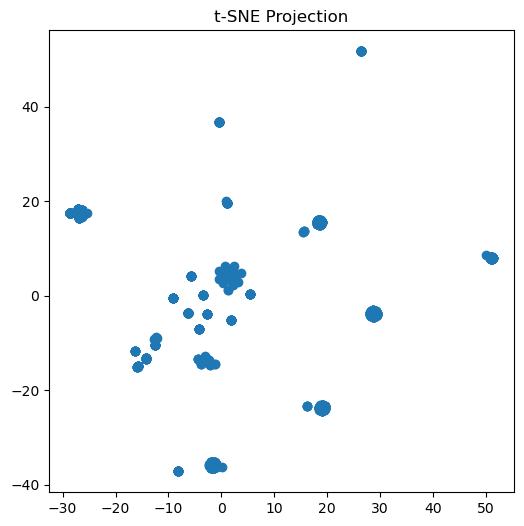

In [51]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform

X = df_word2vec
X_sample = X.sample(n=1000, random_state=0)
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_sample)

# Calculer les distances dans l'espace original et dans l'espace t-SNE 
distances_original = pdist(X_sample, 'euclidean')
distances_tsne = pdist(X_tsne, 'euclidean')
dist_matrix_original = squareform(distances_original)
dist_matrix_tsne = squareform(distances_tsne)

# Calculer la corrélation entre les distances originales et t-SNE
correlation = np.corrcoef(dist_matrix_original.flatten(), dist_matrix_tsne.flatten())[0, 1]
print(f"Corrélation entre les distances originales et t-SNE : {correlation}")

plt.figure(figsize=(6, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=plt.cm.viridis)
plt.title('t-SNE Projection')
plt.show()


# Use Multi Dimensional Scaling with manifold.MDS and project the dataset 
Ici on utilise  Multidimensional Scaling (MDS) pour réduire la dimensionnalité en un espace à deux dimensions. 

**les étapes :**
- On applice le MDS, 
- Ensuite on calcul les distances euclidiennes dans l'espace réduit et compare ces distances à celles de l'espace d'origine, 
- en utilisant la corrélation de Spearman pour évaluer la fidélité de la réduction de dimension. 
- On visualise les résultats de MDS dans un graphique 2D, 

Corrélation de Spearman entre les distances originales et réduites : 0.8284014123512995


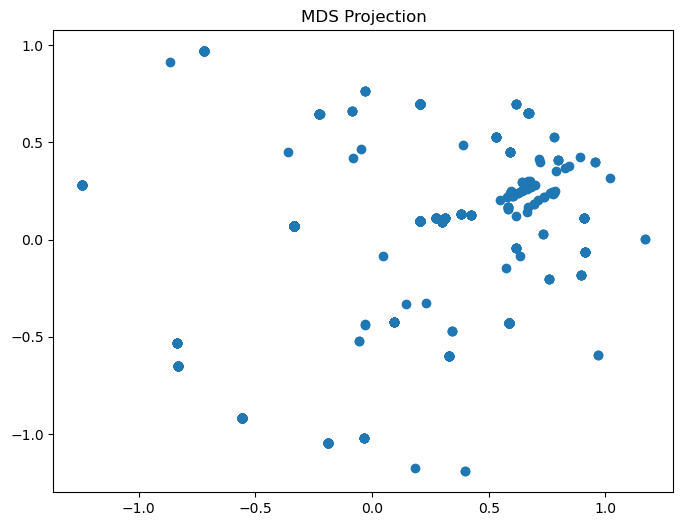

In [48]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from scipy.stats import spearmanr

X = df_word2vec

X_sample = X.sample(n=1000, random_state=0)  
distances = pairwise_distances(X_sample, metric='euclidean')
X_mds = mds.fit_transform(distances)

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
X_mds = mds.fit_transform(distances)

# Calculer la matrice des distances dans l'espace réduit
distances_mds = pairwise_distances(X_mds, metric='euclidean')
distances_flattened = distances.flatten()
distances_mds_flattened = distances_mds.flatten()

# Calculer la corrélation de Spearman entre les distances originales et réduites
correlation, _ = spearmanr(distances_flattened, distances_mds_flattened)
print(f"Corrélation de Spearman entre les distances originales et réduites : {correlation}")

plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], cmap=plt.cm.viridis)
plt.title('MDS Projection')
plt.show()


# Question 9 :Reduce the dimensions to 2D or 3D and scatter the data
Analyse the obtained visualizations 
depending on used embedding methods and conclude how the quality of the data impact these 
results.